### **1. What is a Parameter?**

> A parameter in Machine Learning refers to the internal variables of a model which are to be learned from the training data. These variables are essential for making predictions. Examples like the coefficient and intercept in the linear regression.
    
> Parameters define the learned representation of the model, enabling it to adapt to the data and solve the problem.
Parameters represent the relationships between input features and the target variable:
- In regression, weights(coefficient) define the contribution of each feature.


Example:
In Linear Regression:

$ y = wx + b$

Here, w (weight) and b (bias) are parameters learned during training. Using data we estimate these "Model Parameters". This can also be relate to a equation of line,as by changing the slope and intercept we will get different lines in a line space similarly for a simple regression equation, by changing the parameters we will have different models. We take that parameter which will be more efficient for our data.

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
X = np.reshape([1, 2, 3], (3,1) ) # A 3 x 1 Matrix
y = np.array([2, 4, 6])       # The model will be simple y = 2x + 0

# Model
model = LinearRegression()
model.fit(X, y)  # Training the model   # y = w*x + b

# Parameters
print("Weight (Coefficient):", (model.coef_))  # w
print("Bias (Intercept):", round((model.intercept_),3))  # b


Weight (Coefficient): [2.]
Bias (Intercept): 0.0


In [25]:
type(y)

numpy.ndarray

In [26]:
y.shape

(3,)

In [27]:
X.shape

(3, 1)

### **2. What is correlation? <br> What does negative correlation mean?**

Correlation is a statistical concept or tool which is used to measure the intensity / nature of the relationship between two variables or RVs. It indicates how one variable changes with respect to another.

- Types

    1. **Positive Correlation:** Both variables increase or decrease together.

    2. **Negative Correlation:** One variable increases while the other decreases.

    3. **Zero Correlation:** No relationship between the variables. Though Zero correlation doesn't always imply the variables are absolutely uncorrelated or Completely Independent, They are 'Linearly Uncorrelated'. They could have non-linear relationship.

- Mathematical Expression <br>
> For Variable $X$ and $Y$, <br> <br>
    $ r = \frac{Cov(X , Y)}{\sigma_X \sigma_Y}
    $
    <br>
    Cov is the Covariance and $σ$ is the SDs.


A negative correlation indicates that as one variable increases, the other decreases.

- Example:
Height above sea level and temperature: Higher altitudes generally result in lower temperatures.

Correlation Coefficient: 0.0



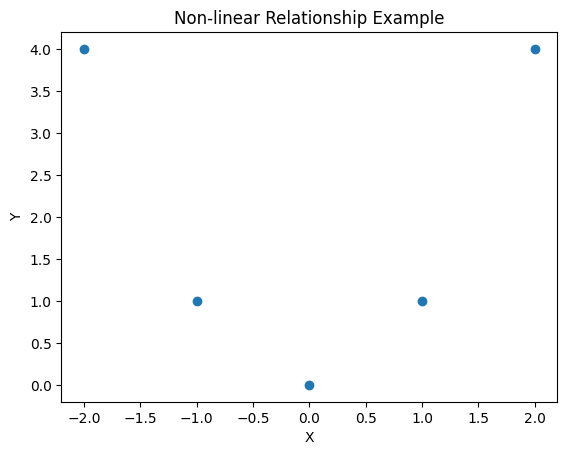

In [33]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-2, -1, 0, 1, 2])
Y = X**2        #here the model is clear y = x**2 and it's visible that the variables are related but the correlation coefficient will be 0 here

# Correlation
correlation = np.corrcoef(X, Y)[0, 1]
print(f"Correlation Coefficient: {correlation}\n")

# Plot
plt.scatter(X, Y)
plt.title("Non-linear Relationship Example")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#so here x and y are LINEARLY UNCORRELATED BUT NOT INDEPENDENT.

In [31]:
np.corrcoef(X,Y)

array([[1., 0.],
       [0., 1.]])

### **3. Define Machine Learning. What are the main components in Machine Learning?**

Machine Learning (ML) can be viewed as a subset of AI that uses algorithms to learn patterns from data and make predictions or take decisions without being explicitly programmed.

*There are three major Components or Types in ML:* <br>
    
1. **Supervised ML**
2. **Unsupervised ML**
3. **Reinforcement Learning**

    Though there is also another type that exists that is Semi-Supervised ML


The process of ML- <br>
> We use related data to train our model, which basically means to estimate our parameters. Then using some other set of data we test our model if the model is efficient and we evaluate the model performance using various methods.

### **4. How does loss value help in determining whether the model is good or not?**

Loss value quantifies the error between the model’s predictions and actual values.

Lower loss indicates better performance.

Examples of Loss Functions:

**MSE (Mean Squared Error)**: For regression tasks.
**Cross-Entropy Loss**: For classification tasks.

In [1]:
# example of calculating mse
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mse = mean_squared_error(y_true, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.375


### **5. What are continuous and categorical variables?**

- Continuous Variables:
Quantitative values that can take any range of numerical values. (e.g., height, weight).

- Categorical Variables:
Qualitative values representing categories (e.g., gender, color).

### **6. How do we handle categorical variables in Machine Learning? What are the common techniques?**

- We implement various data encoding techniques to handle categorical variables in a dataset.

- Some common data encoding techniques are -
1. **Label Encoding** : This assigns unique numerical values to each category. Which are generally in alphabetical order of the category names.
2. **One-Hot / Nominal Encoding** - This treats each category as a separate feature. and generate a sparse binary matrix.
3. **Ordinal Encoding** - This is used when there is some sort of Ranks are involved. Each category is being assigned a num value based on the position or order given.
4. **Target guided Ordinal Encoding** - This uses the relationship of the categorical feature with the target variable and replace the categories with the mean or median of the target values for that category.

In [4]:
# example
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

data = {'Color': ['Red', 'Green', 'Blue']}
df = pd.DataFrame(data)

# Label Encoding
le = LabelEncoder()
df['LabelEncoded'] = le.fit_transform(df['Color'])

# One-Hot Encoding
ohe = OneHotEncoder()
ohe_encoded = ohe.fit_transform(df[['Color']]).toarray()
print("Label Encoded:\n")
df



Label Encoded:



,Color,LabelEncoded
0,Red,2
1,Green,1
2,Blue,0


In [8]:
ohe_encoded_df = pd.DataFrame(ohe_encoded, columns = ohe.get_feature_names_out())
ohe_encoded_df

,Color_Blue,Color_Green,Color_Red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0


### **7. What do you mean by training and testing a dataset?**

*Training Dataset:*

> From a data set we use a partical portion of the data set (say, 80%) to train the model, means we use the full data including the dependent(features) and independent(target) variable to estimate the parameters of the model.

In a notion to a real life scenario it can be looked upon as we give the questions and answers to learn and understand the concept (Pattern).

*Testing Dataset:*

> And the remaining 20% of the data is used to evaluate the model's performance on unseen data (or Un-learned data).

It can be viewed as giving mock tests before facing the actual exam.


### **8. What is sklearn.preprocessing?**

> `sklearn.preprocessin` is a module of the scikit-learn library which provides various utilities for preprocessing the dataset before using it to any Machine Learning model. Proper preprocessing ensures us that the data is clean, standardized, and suitable to use for modeling, which improves model performance and accuracy.

> Some key features includes - <br>
- Encoding Categorical Data - `LabelEncoder`, `OneHotEncoder`, `OrdinalEncoder`
- Scaling and Standardization - `StandardScaler`, `MinMaxScaler`,`Normalizer`

> Data Preprocessing is useful step -
- When the data contains features of different scales or distributions.
- When working with categorical data that needs encoding.
- When the ML algorithms might be sensitive to feature scaling or distribution.

### 9. Answered in 7.

### **10. How do we split data for model fitting (training and testing) in Python? <br>How do you approach a Machine Learning problem?**

> To split data for model training We can use the `train_test_split` function from the model_selection module of sklearn or scikit learn library


> **Process of Approcahing a ML Problem**
1. We have to understand if the problem is of regression (Continuous variables), Classification (Categorical) or a unsupervised problem.
2. Then we need to have the relevent data to solve or train our model.  And we might need to clean or modify the data to make it suitable for model training. By handling misisng values, we need to verify if the data is an imbalanced data, if yes we need to get rid of that using techniques like SMOTE. Then Data encoding for categorical variables and othe preprocessing techniques according to the requirement of the problem.
3. We need to do some EDA to understand the distribution and the statistical overview of the data.
4. Then we might find and extract the most relevant feature of the data rather than using all features which might not even necessary also we have to chcek for any outliers effect.
5. Then we can split the data into train and test data. and choose an appropriate type of model according to the model and expected result, Then we will train the model and evaluate and optimize the model performance


In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
# Example Data
X = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Data:", X_train, y_train)
print("Test Data:", X_test, y_test)


Train Data: [5, 3, 1, 4] [50, 30, 10, 40]
Test Data: [2] [20]


### **11. Why do we have to perform EDA before fitting a model to the data**

> The primary reason is to identify and have a statistical overview of the data. By Exploratory Data Analysis we will be able to know the distribution of the data, if the data have any unusual or outlier points, how the variables are related.

### 12 13 repeated. Answered

### **14.How can you find correlation between variables in Python**

> We can use the `corr()` method the pandas library or we can also use the `np.corrcoef(x ,y)` function of the numpy library. Both will give us the correlation matrix, numpy will return in an array form by default.

In [12]:
#   EXAMPLES OF CALCULATING CORRELATION COEFFICIENT
import pandas as pd

# Example Data
data = {'X': [1, 2, 3, 4], 'Y': [10, 8, 6, 4]}
df = pd.DataFrame(data)

# Compute Correlation
correlation = df.corr()
correlation


,X,Y
X,1.0,-1.0
Y,-1.0,1.0


In [11]:
df

,X,Y
0,1,10
1,2,8
2,3,6
3,4,4


In [14]:
import numpy as np
pd.DataFrame(np.corrcoef(df.X , df.Y))

,0,1
0,1.0,-1.0
1,-1.0,1.0


### **15. What is causation? Explain the difference between correlation and causation with an example.**

> Correlation represent the simple state of relationship which says that the two variables might be relatable but Causation means some action is the direct cause of the outcome. Both can happen simultaneously as well but correlated doesn't imply casation.

> For example, Like ice cream sales and being tanned by sun is correlated but these are not in causation but the background cause might be summer. Summer is reason for high ice cream salses and summer is also the reason of being tanned in the sun.

> Another example might be sugar intake and obesity, they are might be correlated and the action of High sugar intake can causes obesity.

> So in correlation two variables are depends on each other and changes accordingly but in Causation one variable is the **Direct Reason** of the effect of another variable.

### **16.  What is an Optimizer? What are different types of optimizers? Explain each with an example.**

> An optimizer in Machine Learning is an algorithm used to adjust model parameters *to minimize the loss function* during training.

> Types of Optimizers:
1. **Gradient Descent:**
Updates parameters by moving in the direction of the negative gradient.
Example: Standard gradient descent.
2. **Stochastic Gradient Descent (SGD):**
Updates parameters for each data point.
3. **Momentum:** Combines previous updates with the current gradient to speed up convergence.
Example: Optimizer with momentum factor.
4. **Adam (Adaptive Moment Estimation):**
Combines momentum and adaptive learning rates.
Popular for deep learning tasks.

### **17. What is sklearn.linear_model?**

> `sklearn.linear_model` is a module in scikit-learn which provides us implementations of linear models using which we can fit our model on the data and know the model parameters -
- Linear Regression
- Logistic Regression
- Ridge Regression
- Lasso Regression

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Example Data
X = np.reshape([1, 2, 3], (3,1))
y = [2, 4, 6]

# Model
model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient: [2.]
Intercept: 8.881784197001252e-16


### **18.  What does model.fit() do? What arguments must be given?**

> `model.fit()` trains the model on the given dataset and find the fitted model (eqn) for that data by estimating the model parameters using optimization techniques. And returns us the coefficient and intercept of the model. <br>
As arguments we have to give our Features (independent) and Target (dependent variables/labels)

### 19. What does model.predict() do? What arguments must be given?

> model.predict() makes predictions on new or unseen data based on the trained or fitted model.
As arguments it will only the unseen X (Features) values only as will return the predicted y values. and Using this we can evaluate our model performances.

### 20. Repeated. already answered.

### **21. What is feature scaling? How does it help in Machine Learning** And 22. How do we perform

> Feature scaling is the process of normalizing or standardizing the range of independent variables or features.

> - Prevents Bias: Ensures features with larger scales do not dominate.
- Improves Model Performance: Essential for algorithms like SVMs, KNN, and Gradient Descent.
- Speeds Up Convergence: Optimizers perform better when features are scaled.
- Common Techniques:
- Min-Max Scaling: Scales features to a [0, 1] range.
- Standardization (Z-score): Transforms features to have a mean of 0 and standard deviation of 1.

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Example Data
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]       #4 x 2 => 2 features

# Min-Max Scaling
scaler = MinMaxScaler()     #making an object
scaled_data = scaler.fit_transform(data)    #this will make all data points ranges between 0 to 1
'''
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
'''

print("Min-Max Scaled Data:\n")
pd.DataFrame(scaled_data)




Min-Max Scaled Data:



,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,1.00,1.00


In [21]:
# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print("Standardized Data:\n")
pd.DataFrame(standardized_data)

Standardized Data:



,0,1
0,-1.183216,-1.183216
1,-0.507093,-0.507093
2,0.169031,0.169031
3,1.521278,1.521278


### 23. 24. repeated

### **25. Explain Data Encoding**

> Data encoding is the process or technique of transforming categorical variables into numerical format for Machine Learning models to process. There are some types of data encoding depending upon the type of the data

> **1. Label Encoding**: Assigns each category a unique integer. Generally in alphabetical order
Example: ['Red', 'Green', 'Blue'] → [2, 1, 0].

> **2. One-Hot Encoding**: Creates binary matrix where each category of the variable works as a separate feature.
Example: ['Red', 'Green', 'Blue'] → [[1, 0, 0], [0, 1, 0], [0, 0, 1]].

> **3. Ordinal Encoding**:
Encodes categories with a meaningful order. useful where ranks are involved.
Example: ['Low', 'Medium', 'High'] → [1, 2, 3].
There is also a sub-part to this as *Target guided Ordinal Encoding* this replaces each category based on the relationship with target and by their mean or median. We use pandas `pd.groupby()` method for this.

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Example Data
data = {'Color': ['Red', 'Green', 'Blue']}
df = pd.DataFrame(data)

# Label Encoding
le = LabelEncoder()
df['LabelEncoded'] = le.fit_transform(df['Color'])

# One-Hot Encoding
ohe = OneHotEncoder()
encoded = ohe.fit_transform(df[['Color']]).toarray()

print("Label Encoded:\n")
pd.DataFrame(df)        #this automatically generates nums as the alphabetical order.


Label Encoded:



,Color,LabelEncoded
0,Red,2
1,Green,1
2,Blue,0


In [24]:
print("One-Hot Encoded:\n")
pd.DataFrame(encoded)

One-Hot Encoded:



,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
